In [69]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline
register_matplotlib_converters()

In [70]:
filename = '..\solardb\AnXin-2020-0505.db'
with sqlite3.connect(filename) as con:
    invdf  = pd.read_sql('''select * from inverter_minutely''', con=con)
invdf.LoggedDatetime  = pd.to_datetime(invdf.LoggedDatetime)

In [71]:
invdf = invdf.set_index('LoggedDatetime')

In [72]:
inv1 = invdf.query('DeviceID == 1')
inv2 = invdf.query('DeviceID == 2')

In [73]:
import collections
interval = collections.OrderedDict()
for h in range(5, 18):
    t1 = '2020-05-05 {:02d}:00:00'.format(h)
    t2 = '2020-05-05 {:02d}:00:00'.format(h+1)
    interval[h] = (t1, t2)
    #print('{}, {}'.format(t1, t2))

data = []
for t in interval.values():
    #print('{}, {}'.format(t[0], t[1]))
    invh = inv1[t[0]:t[1]]
    print('{} to {}, mean:{:06.3f}, std:{:4.3f}'.format(t[0], t[1], invh.ACOutputPower.mean(), invh.ACOutputPower.std()))
    
    d = {'hour': t[0], 'mean': invh.ACOutputPower.mean(), 'std': invh.ACOutputPower.std()}
    data.append(d)
    
df = pd.DataFrame(data)
df = df.set_index('hour')
df

2020-05-05 05:00:00 to 2020-05-05 06:00:00, mean:00.884, std:1.203
2020-05-05 06:00:00 to 2020-05-05 07:00:00, mean:12.525, std:4.994
2020-05-05 07:00:00 to 2020-05-05 08:00:00, mean:26.583, std:3.191
2020-05-05 08:00:00 to 2020-05-05 09:00:00, mean:35.334, std:1.889
2020-05-05 09:00:00 to 2020-05-05 10:00:00, mean:38.648, std:2.708
2020-05-05 10:00:00 to 2020-05-05 11:00:00, mean:43.135, std:0.580
2020-05-05 11:00:00 to 2020-05-05 12:00:00, mean:43.447, std:0.564
2020-05-05 12:00:00 to 2020-05-05 13:00:00, mean:40.994, std:1.669
2020-05-05 13:00:00 to 2020-05-05 14:00:00, mean:35.923, std:2.072
2020-05-05 14:00:00 to 2020-05-05 15:00:00, mean:27.709, std:3.163
2020-05-05 15:00:00 to 2020-05-05 16:00:00, mean:16.836, std:3.325
2020-05-05 16:00:00 to 2020-05-05 17:00:00, mean:06.706, std:2.328
2020-05-05 17:00:00 to 2020-05-05 18:00:00, mean:02.263, std:0.704


,mean,std
hour,,
2020-05-05 05:00:00,0.884043,1.202594
2020-05-05 06:00:00,12.525085,4.993703
2020-05-05 07:00:00,26.582712,3.191453
2020-05-05 08:00:00,35.334237,1.889175
2020-05-05 09:00:00,38.648448,2.708240
2020-05-05 10:00:00,43.135476,0.579711
2020-05-05 11:00:00,43.447241,0.564023
2020-05-05 12:00:00,40.994048,1.668991
2020-05-05 13:00:00,35.922759,2.071767


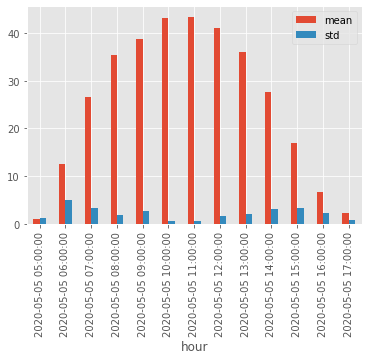

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#matplotlib.style.use("ggplot")
df.plot.bar()
